# regresión logística
El clasificador de regresión logística se utiliza para problemas biclase y en donde las clases son linealmente separables. Sus prestaciones se pueden extender a problemas multiclase a traves de la técnica *One vs Rest* u OvR. Este clasificador parte de la probabilidad a favor de un determinado evento, definida por *razon de momios* u *odds ratio*

$$OR = \frac{p}{1-p},$$

donde $p$ es la probabilidad del evento.

Al OR le podemos calcular el logarítmo para obtener la función **logit**.

$$logit(p)=\log\frac{p}{1-p}$$

En términos de los parametros de entrada de nuestro clasificador tendremos: 

$$logit(p)=logit(P(y=1|\mathbf{x}))=w_0x_0+w_1x_1+\ldots+w_{1-p}x_{1-p}=\sum_{i=0}^{1-p}w_ix_i=\mathbf{w}^{\top}\mathbf{x}=z$$

Lo que queremos hacer es despejar la probabilidad del event, que se va a relacionar con la probabilidad de que una observación pertenezca a la clase con la etiqueta $y=1$. Para ello utilizamos la función inversa, que se denomina **sigmoide**.

$$\phi(z)=\frac{1}{1+e^{-z}}$$

Gáficamente tendremos:

In [1504]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoide(z):
    función_sigmoide = 1.0/(1.0+np.exp(-z))
    return función_sigmoide

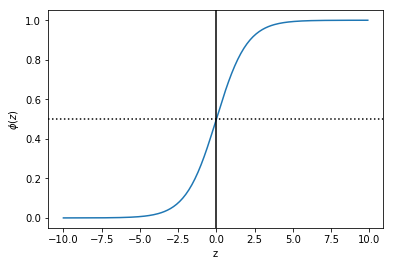

In [1505]:
z = np.mgrid[-10:10:0.1]
fi = sigmoide(z)

plt.plot(z,fi)
plt.axvline(0,0,color='k')
plt.axhline(y = 0.5,ls='dotted',color='k')
plt.ylabel('$\phi(z)$')
plt.xlabel('z')
plt.show()

# Base de datos(Iris):
La BD Iris es muy utilizada para probar los algoritmos de ML.
Consiste de 150 observaciones y tres clases(50 observaciones por clase). Las tres clases son: *Iris Setosa*, *Iris Versicolor* e *Iris Virginica*. Cada observación tiene 4 caracteristicas: Largo y ancho del sépalo y el largo y ancho del pétalo.

![Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/P%C3%A9talo-s%C3%A9palo.jpg/220px-P%C3%A9talo-s%C3%A9palo.jpg)

In [1506]:
#Cargar la BD
from sklearn import datasets

iris = datasets.load_iris() #Se carga la BD
X = iris.data[:,[1,2]] #Matriz de datos (Solo se toman 2 caracteristicas por efectos de visualización)
y = iris.target #Las etiquetas
print(np.unique(y))

[0 1 2]


In [1507]:
def Binarizacion(X):
    filas = np.shape(X)[0]
    columnas =  np.shape(X)[1]
    media = X.mean(axis=0)
    for i in range(filas):
        for j in range(columnas):
            if X[i][j] >= media[j]:
                X[i][j] = 1
            else:
                X[i][j] = 0
    return X

In [1508]:
def Remocion(X, mean, stdd):
    X = X - mean
    X = X/stdd
    return X

In [1509]:
def Escalar(X):
    minimos = [0,0,0]
    maximos = [0,0,0]
    columnas = np.shape(X)[1]
    for i in range(columnas):
        minimos[i] = X[:,i].min()
        maximos[i] = X[:,i].max()
    print(minimos,maximos)
    for j in range(columnas):
        X[:,j] = ((X[:,j] - minimos[j])) / (maximos[j] - minimos[j])
    return X

In [1510]:
def Normalizacion1(X):
    filas = np.shape(X)[0]
    columnas =  np.shape(X)[1]
    norma = np.linalg.norm(X,ord=1,axis=1)
    for i in range(filas):
            X[i][:] =  X[i][:]/norma[i]
    return X

In [1511]:
def Normalizacion2(X):
    filas = np.shape(X)[0]
    columnas =  np.shape(X)[1]
    norma = np.linalg.norm(X,ord=2,axis=1)
    for i in range(filas):
            X[i][:] =  X[i][:]/norma[i]
    return X

In [1512]:
from sklearn.linear_model import LogisticRegression # modelo de clasificación
from sklearn.cross_validation import train_test_split # funciones de validación cruzada
from sklearn.preprocessing import StandardScaler # funciones de preprocesamiento

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
XTrain = Remocion(X_train,X_mean,X_std)#,X_mean,X_std
XTest = Remocion(X_test,X_mean,X_std)#,X_mean,X_std

#print(XTest)

# Entrenamos el clasificador
clasificador = LogisticRegression(C=1000, random_state=0) #C es el parametro de regularización
clasificador.fit(XTrain, y_train) # entrenamiento del clasificador

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1513]:
# para validar el clasificador
y_pred = clasificador.predict(XTest)
print('Las muestras mal clasificadas fueron %d'%(y_test != y_pred).sum())

Las muestras mal clasificadas fueron 2


In [1514]:
def visualizar_clasificador(clasificador,X,y):
    #definimos maximos y minimos de la malla
    min_x,max_x = X[:,0].min()-1.0, X[:,0].max()+1.0
    min_y,max_y = X[:,1].min()-1.0, X[:,1].max()+1.0
    #definimos el paso de la malla
    paso = 0.01
    #definimos la malla
    x_vals,y_vals = np.mgrid[min_x:max_x:paso, min_y:max_y:paso]
    #correr el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    #reordenamos la salida para que quede en forma de malla
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    # Elegimos la paleta de colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Set1)
    
    # Ubicamos los puntos a clasificar
    #para el scatter: X[:,0]punto en el eje x, X[:,1]punto en el eje y, 
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Set1)
    plt.xlim(x_vals.min(),x_vals.max())
    plt.ylim(y_vals.min(),y_vals.max())
    plt.show()

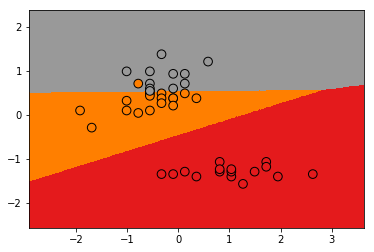

In [1515]:
visualizar_clasificador(clasificador,XTest,y_test)